In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Using TensorFlow backend.


In [22]:
df = pd.read_csv("C:/Users/Zhastay/Desktop/temp_sort_new.csv")

In [23]:
df

,time,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,...,c1_23l,c1_30h,c1_30l,cond2_off,c2_16h,c2_16l,c2_23h,c2_23l,c2_30h,c2_30l
0,11.06.2019 16:11,23,23,23,23,24,23,23,24,24,...,0,0,0,0,1,0,0,0,0,0
1,11.06.2019 16:31,23,23,23,24,24,23,23,25,24,...,0,0,0,0,0,0,0,0,0,0
2,11.06.2019 16:51,23,24,24,24,25,24,24,25,25,...,0,0,0,0,0,0,0,0,0,1
3,11.06.2019 17:11,23,24,24,25,25,24,24,25,25,...,0,0,0,0,0,0,0,0,0,0
4,11.06.2019 17:31,22,24,25,25,25,24,24,25,25,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,13.06.2019 8:27,24,22,22,22,23,22,22,23,22,...,0,0,0,1,0,0,0,0,0,0
83,13.06.2019 8:47,24,22,22,22,23,22,22,23,23,...,0,0,0,0,0,0,0,0,1,0
84,13.06.2019 9:07,23,22,22,23,23,22,22,23,23,...,0,0,0,0,0,0,0,0,0,0
85,13.06.2019 9:27,24,22,23,23,22,22,22,23,22,...,0,0,0,0,0,1,0,0,0,0


c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021043F95898>,
      dtype=object)

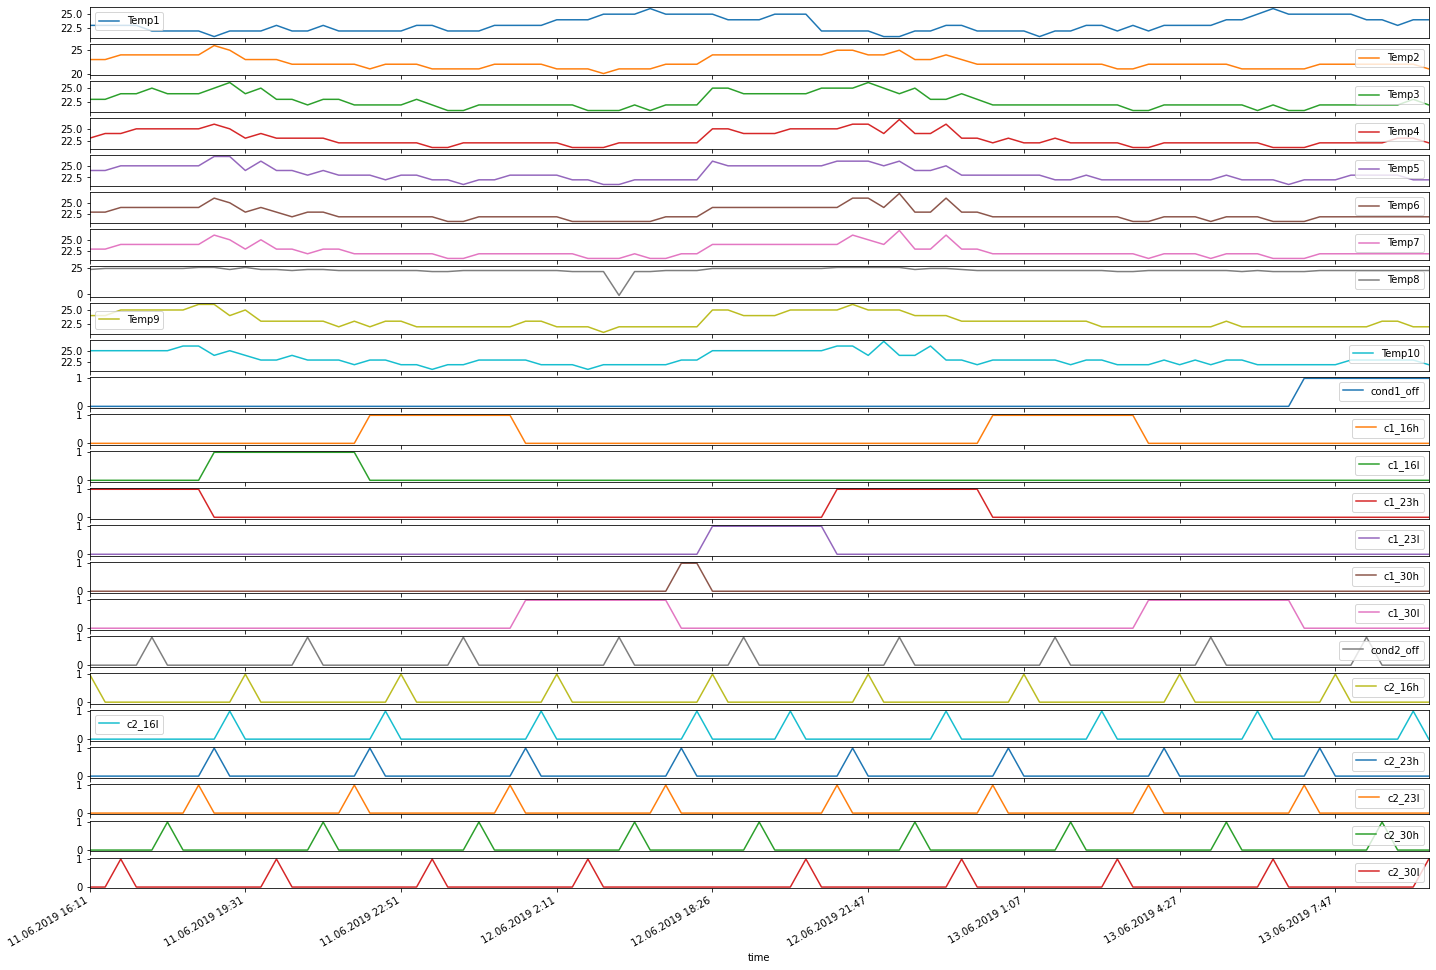

In [24]:
mpl.rcParams['figure.figsize'] = (24,18)
mpl.rcParams['axes.grid'] = False
uni_data = df
uni_data.index = df['time']
uni_data.head()
uni_data.plot(subplots=True)

In [25]:
df = df.set_index('time')
df.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10', 'cond1_off', 'c1_16h', 'c1_16l', 'c1_23h', 'c1_23l', 'c1_30h', 'c1_30l', 'cond2_off', 'c2_16h', 'c2_16l', 'c2_23h', 'c2_23l', 'c2_30h', 'c2_30l']

In [27]:
df['Temp1+1'] = df['Temp1'].shift(-1)
df['Temp2+1'] = df['Temp2'].shift(-1)
df['Temp3+1'] = df['Temp3'].shift(-1)
df['Temp4+1'] = df['Temp4'].shift(-1)
df['Temp5+1'] = df['Temp5'].shift(-1)
df['Temp6+1'] = df['Temp6'].shift(-1)
df['Temp7+1'] = df['Temp7'].shift(-1)
df['Temp8+1'] = df['Temp8'].shift(-1)
df['Temp9+1'] = df['Temp9'].shift(-1)
df['Temp10+1'] = df['Temp10'].shift(-1)

In [28]:
df['Temp1+1'].fillna(24, inplace=True)
df['Temp2+1'].fillna(24, inplace=True)
df['Temp3+1'].fillna(24, inplace=True)
df['Temp4+1'].fillna(24, inplace=True)
df['Temp5+1'].fillna(24, inplace=True)
df['Temp6+1'].fillna(24, inplace=True)
df['Temp7+1'].fillna(24, inplace=True)
df['Temp8+1'].fillna(24, inplace=True)
df['Temp9+1'].fillna(24, inplace=True)
df['Temp10+1'].fillna(24, inplace=True)

In [64]:
df

,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Temp10,...,Temp1+1,Temp2+1,Temp3+1,Temp4+1,Temp5+1,Temp6+1,Temp7+1,Temp8+1,Temp9+1,Temp10+1
time,,,,,,,,,,,,,,,,,,,,,
11.06.2019 16:11,23,23,23,23,24,23,23,24,24,25,...,23.0,23.0,23.0,24.0,24.0,23.0,23.0,25.0,24.0,25.0
11.06.2019 16:31,23,23,23,24,24,23,23,25,24,25,...,23.0,24.0,24.0,24.0,25.0,24.0,24.0,25.0,25.0,25.0
11.06.2019 16:51,23,24,24,24,25,24,24,25,25,25,...,23.0,24.0,24.0,25.0,25.0,24.0,24.0,25.0,25.0,25.0
11.06.2019 17:11,23,24,24,25,25,24,24,25,25,25,...,22.0,24.0,25.0,25.0,25.0,24.0,24.0,25.0,25.0,25.0
11.06.2019 17:31,22,24,25,25,25,24,24,25,25,25,...,22.0,24.0,24.0,25.0,25.0,24.0,24.0,25.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.06.2019 8:27,24,22,22,22,23,22,22,23,22,23,...,24.0,22.0,22.0,22.0,23.0,22.0,22.0,23.0,23.0,23.0
13.06.2019 8:47,24,22,22,22,23,22,22,23,23,23,...,23.0,22.0,22.0,23.0,23.0,22.0,22.0,23.0,23.0,23.0
13.06.2019 9:07,23,22,22,23,23,22,22,23,23,23,...,24.0,22.0,23.0,23.0,22.0,22.0,22.0,23.0,22.0,23.0


In [66]:
#%%
x = df.drop(['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1'], axis = 1)
y = df[['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1']]
#%%
y=np.reshape(y.values, (-1,10))

#%%
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)
#%%
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, train_size = 1)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [91]:
x

,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Temp10,...,c1_23l,c1_30h,c1_30l,cond2_off,c2_16h,c2_16l,c2_23h,c2_23l,c2_30h,c2_30l
time,,,,,,,,,,,,,,,,,,,,,
11.06.2019 16:11,23,23,23,23,24,23,23,24,24,25,...,0,0,0,0,1,0,0,0,0,0
11.06.2019 16:31,23,23,23,24,24,23,23,25,24,25,...,0,0,0,0,0,0,0,0,0,0
11.06.2019 16:51,23,24,24,24,25,24,24,25,25,25,...,0,0,0,0,0,0,0,0,0,1
11.06.2019 17:11,23,24,24,25,25,24,24,25,25,25,...,0,0,0,0,0,0,0,0,0,0
11.06.2019 17:31,22,24,25,25,25,24,24,25,25,25,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.06.2019 8:27,24,22,22,22,23,22,22,23,22,23,...,0,0,0,1,0,0,0,0,0,0
13.06.2019 8:47,24,22,22,22,23,22,22,23,23,23,...,0,0,0,0,0,0,0,0,1,0
13.06.2019 9:07,23,22,22,23,23,22,22,23,23,23,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X_test

array([[0.2       , 0.33333333, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.16666667, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.5       , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.2       , 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.5       , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.16666667, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
model = Sequential()
model.add(Dense(16, input_dim=24, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='linear'))
model.summary()
# Use a custom metricfunction

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

fit = model.fit(xscale, yscale, epochs=1000,  verbose=1, validation_split=0.01)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                90        
Total params: 626
Trainable params: 626
Non-trainable params: 0
_________________________________________________________________
Train on 86 samples, validate on 1 samples
Epoch 1/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.2400 - mse: 0.2400 - val_loss: 0.3557 - val_mse: 0.3557
Epoch 2/1000
86/86 [==============================] - 0s 93us/step - loss: 0.2321 - mse: 0.2321 - val_loss: 0.3448 - val_mse: 0.3448
Epoch 3/1000
86/86 [==============================] - 0s 70us/step - loss: 0.2

86/86 [==============================] - 0s 58us/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.1100 - val_mse: 0.1100
Epoch 57/1000
86/86 [==============================] - 0s 46us/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.1107 - val_mse: 0.1107
Epoch 58/1000
86/86 [==============================] - 0s 82us/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.1117 - val_mse: 0.1117
Epoch 59/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.1131 - val_mse: 0.1131
Epoch 60/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.1141 - val_mse: 0.1141
Epoch 61/1000
86/86 [==============================] - 0s 47us/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.1148 - val_mse: 0.1148
Epoch 62/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.1156 - val_mse: 0.1156
Epoch 63/1000
86/86 [==============================] - 0s 58us/step - loss: 

86/86 [==============================] - 0s 81us/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.1292 - val_mse: 0.1292
Epoch 118/1000
86/86 [==============================] - 0s 81us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 119/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 120/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.1287 - val_mse: 0.1287
Epoch 121/1000
86/86 [==============================] - 0s 82us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.1284 - val_mse: 0.1284
Epoch 122/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.1287 - val_mse: 0.1287
Epoch 123/1000
86/86 [==============================] - 0s 65us/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.1302 - val_mse: 0.1302
Epoch 124/1000
86/86 [==============================] - 0s 70us/step -

Epoch 178/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.1323 - val_mse: 0.1323
Epoch 179/1000
86/86 [==============================] - 0s 46us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.1322 - val_mse: 0.1322
Epoch 180/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.1315 - val_mse: 0.1315
Epoch 181/1000
86/86 [==============================] - 0s 46us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 182/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 183/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.1316 - val_mse: 0.1316
Epoch 184/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 185/1000
86/86 [==============================] -

Epoch 239/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 240/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 241/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.1260 - val_mse: 0.1260
Epoch 242/1000
86/86 [==============================] - 0s 46us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.1258 - val_mse: 0.1258
Epoch 243/1000
86/86 [==============================] - 0s 81us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.1260 - val_mse: 0.1260
Epoch 244/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 245/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.1251 - val_mse: 0.1251
Epoch 246/1000
86/86 [==============================] -

Epoch 300/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.1299 - val_mse: 0.1299
Epoch 301/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.1290 - val_mse: 0.1290
Epoch 302/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.1278 - val_mse: 0.1278
Epoch 303/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.1264 - val_mse: 0.1264
Epoch 304/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.1262 - val_mse: 0.1262
Epoch 305/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 306/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 307/1000
86/86 [==============================] -

Epoch 361/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.1308 - val_mse: 0.1308
Epoch 362/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 363/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.1312 - val_mse: 0.1312
Epoch 364/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.1307 - val_mse: 0.1307
Epoch 365/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.1308 - val_mse: 0.1308
Epoch 366/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 367/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.1320 - val_mse: 0.1320
Epoch 368/1000
86/86 [==============================] -

Epoch 422/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.1302 - val_mse: 0.1302
Epoch 423/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.1317 - val_mse: 0.1317
Epoch 424/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.1314 - val_mse: 0.1314
Epoch 425/1000
86/86 [==============================] - 0s 69us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.1298 - val_mse: 0.1298
Epoch 426/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 427/1000
86/86 [==============================] - 0s 46us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.1312 - val_mse: 0.1312
Epoch 428/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.1314 - val_mse: 0.1314
Epoch 429/1000
86/86 [==============================] -

Epoch 483/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.1330 - val_mse: 0.1330
Epoch 484/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.1336 - val_mse: 0.1336
Epoch 485/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.1332 - val_mse: 0.1332
Epoch 486/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.1319 - val_mse: 0.1319
Epoch 487/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.1331 - val_mse: 0.1331
Epoch 488/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.1347 - val_mse: 0.1347
Epoch 489/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.1340 - val_mse: 0.1340
Epoch 490/1000
86/86 [==============================] -

Epoch 544/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.1373 - val_mse: 0.1373
Epoch 545/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.1387 - val_mse: 0.1387
Epoch 546/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.1385 - val_mse: 0.1385
Epoch 547/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 548/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 549/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 550/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.1385 - val_mse: 0.1385
Epoch 551/1000
86/86 [==============================] -

Epoch 605/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.1368 - val_mse: 0.1368
Epoch 606/1000
86/86 [==============================] - 0s 69us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.1366 - val_mse: 0.1366
Epoch 607/1000
86/86 [==============================] - 0s 69us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.1382 - val_mse: 0.1382
Epoch 608/1000
86/86 [==============================] - 0s 46us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.1381 - val_mse: 0.1381
Epoch 609/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.1363 - val_mse: 0.1363
Epoch 610/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.1368 - val_mse: 0.1368
Epoch 611/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.1366 - val_mse: 0.1366
Epoch 612/1000
86/86 [==============================] -

Epoch 666/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.1394 - val_mse: 0.1394
Epoch 667/1000
86/86 [==============================] - 0s 81us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.1365 - val_mse: 0.1365
Epoch 668/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.1386 - val_mse: 0.1386
Epoch 669/1000
86/86 [==============================] - 0s 69us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.1396 - val_mse: 0.1396
Epoch 670/1000
86/86 [==============================] - 0s 59us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.1391 - val_mse: 0.1391
Epoch 671/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.1387 - val_mse: 0.1387
Epoch 672/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.1386 - val_mse: 0.1386
Epoch 673/1000
86/86 [==============================] -

Epoch 727/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.1409 - val_mse: 0.1409
Epoch 728/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 729/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.1380 - val_mse: 0.1380
Epoch 730/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.1396 - val_mse: 0.1396
Epoch 731/1000
86/86 [==============================] - 0s 47us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.1418 - val_mse: 0.1418
Epoch 732/1000
86/86 [==============================] - 0s 81us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.1429 - val_mse: 0.1429
Epoch 733/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 734/1000
86/86 [==============================] -

86/86 [==============================] - 0s 81us/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.1424 - val_mse: 0.1424
Epoch 788/1000
86/86 [==============================] - 0s 46us/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.1430 - val_mse: 0.1430
Epoch 789/1000
86/86 [==============================] - 0s 81us/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.1429 - val_mse: 0.1429
Epoch 790/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.1417 - val_mse: 0.1417
Epoch 791/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.1415 - val_mse: 0.1415
Epoch 792/1000
86/86 [==============================] - 0s 81us/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.1428 - val_mse: 0.1428
Epoch 793/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.1416 - val_mse: 0.1416
Epoch 794/1000
86/86 [==============================] - 0s 58us/step -

Epoch 848/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.1423 - val_mse: 0.1423
Epoch 849/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.1408 - val_mse: 0.1408
Epoch 850/1000
86/86 [==============================] - 0s 69us/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.1417 - val_mse: 0.1417
Epoch 851/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.1427 - val_mse: 0.1427
Epoch 852/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.1454 - val_mse: 0.1454
Epoch 853/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.1449 - val_mse: 0.1449
Epoch 854/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.1435 - val_mse: 0.1435
Epoch 855/1000
86/86 [==============================] -

86/86 [==============================] - 0s 46us/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.1457 - val_mse: 0.1457
Epoch 909/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.1438 - val_mse: 0.1438
Epoch 910/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.1439 - val_mse: 0.1439
Epoch 911/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.1455 - val_mse: 0.1455
Epoch 912/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.1433 - val_mse: 0.1433
Epoch 913/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.1419 - val_mse: 0.1419
Epoch 914/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.1424 - val_mse: 0.1424
Epoch 915/1000
86/86 [==============================] - 0s 58us/step -

Epoch 969/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.1428 - val_mse: 0.1428
Epoch 970/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.1429 - val_mse: 0.1429
Epoch 971/1000
86/86 [==============================] - 0s 46us/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.1459 - val_mse: 0.1459
Epoch 972/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.1441 - val_mse: 0.1441
Epoch 973/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.1420 - val_mse: 0.1420
Epoch 974/1000
86/86 [==============================] - 0s 58us/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.1441 - val_mse: 0.1441
Epoch 975/1000
86/86 [==============================] - 0s 70us/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.1443 - val_mse: 0.1443
Epoch 976/1000
86/86 [==============================] -

# Testing and Experiments

In [83]:
test_df = pd.read_csv("C:/Users/Zhastay/Desktop/test_df.csv")
cond = pd.read_csv("C:/Users/Zhastay/Desktop/cond.csv")

In [93]:
test_df = test_df.set_index('time')
test_df.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10', 'cond1_off', 'c1_16h', 'c1_16l', 'c1_23h', 'c1_23l', 'c1_30h', 'c1_30l', 'cond2_off', 'c2_16h', 'c2_16l', 'c2_23h', 'c2_23l', 'c2_30h', 'c2_30l']

In [102]:
test_df = test_df.values

In [104]:
scaler_x.fit(test_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [105]:
scaler_x.transform(test_df)

array([[1.        , 0.25      , 0.        , 0.5       , 0.25      ,
        1.        , 0.2       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.33333333, 1.        , 0.25      ,
        0.5       , 0.2       , 0.2       , 1.        , 0.75      ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.66666667, 0.        , 0.25      ,
        0.25      , 0.4       , 0.2       , 0.33333333, 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.   

In [106]:
print(test_df)
ynew= model.predict(scaler_x.transform(test_df))
ynew = scaler_y.inverse_transform(ynew)
print(" Predicted=%s" % (ynew))

[[30 26 25 27 25 29 26 25 25 26  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [27 25 26 28 25 27 26 26 28 29  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [30 25 27 26 25 26 27 26 26 28  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [24 25 26 26 25 28 25 26 26 28  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [26 25 26 28 24 25 26 27 28 29  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [30 29 28 28 26 28 27 26 28 27  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [24 25 26 27 28 26 25 25 28 26  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [27 28 25 26 27 28 30 30 28 27  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [25 26 26 28 27 26 26 27 28 30  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [28 26 25 27 26 28 27 26 28 30  0  1  0  0  0  0  0  0  0  0  0  0  0  0]]
 Predicted=[[24.445507 22.02124  22.665035 21.777798 21.409702 21.383457 20.999628
  14.025466 21.683092 22.947346]
 [22.889374 23.67459  24.403824 24.319038 24.66742  24.003613 23.81793
  16.531637 23.706211 24.357954]
 [24.716318 21.326944 21.5192

In [107]:
print(test_df)
ynew= model.predict(scaler_x.transform(test_df))
ynew = scaler_y.inverse_transform(ynew)
print(" Predicted=%s" % (ynew))

[[30 26 25 27 25 29 26 25 25 26  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [27 25 26 28 25 27 26 26 28 29  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [30 25 27 26 25 26 27 26 26 28  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [24 25 26 26 25 28 25 26 26 28  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [26 25 26 28 24 25 26 27 28 29  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [30 29 28 28 26 28 27 26 28 27  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [24 25 26 27 28 26 25 25 28 26  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [27 28 25 26 27 28 30 30 28 27  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [25 26 26 28 27 26 26 27 28 30  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [28 26 25 27 26 28 27 26 28 30  0  1  0  0  0  0  0  0  0  0  0  0  0  0]]
 Predicted=[[24.445507 22.02124  22.665035 21.777798 21.409702 21.383457 20.999628
  14.025466 21.683092 22.947346]
 [22.889374 23.67459  24.403824 24.319038 24.66742  24.003613 23.81793
  16.531637 23.706211 24.357954]
 [24.716318 21.326944 21.5192

In [72]:
for i in range(len(ynew[0])):
    print(i+1, '\t',my_test[0][i], '\t', ynew[0][i])

1 	 23.0 	 22.315542
2 	 22.0 	 22.161419
3 	 23.0 	 23.010216
4 	 23.0 	 22.62157
5 	 24.0 	 23.609985
6 	 23.0 	 22.602337
7 	 23.0 	 22.706697
8 	 24.0 	 22.933216
9 	 23.0 	 22.78435
10 	 23.0 	 22.78024


In [25]:
outview = np.concatenate((my_test, ynew, difference), axis=1)
for i in range(len(my_test)):
    print(int(outview[i][0]), '\t-\t', outview[i][1], '\t->\t', outview[i][2] )

22 	-	 22.014036178588867 	->	 -0.014036178588867188
22 	-	 22.064472198486328 	->	 -0.06447219848632812
23 	-	 22.989303588867188 	->	 0.0106964111328125
23 	-	 23.11386489868164 	->	 -0.11386489868164062
22 	-	 22.18929672241211 	->	 -0.18929672241210938
23 	-	 23.026214599609375 	->	 -0.026214599609375
24 	-	 23.681415557861328 	->	 0.3185844421386754
22 	-	 21.988025665283203 	->	 0.011974334716796875
23 	-	 23.24394416809082 	->	 -0.2439441680908203
21 	-	 21.711626052856445 	->	 -0.7116260528564453
25 	-	 25.04488754272461 	->	 -0.044887542724609375
25 	-	 25.182872772216797 	->	 -0.18287277221679688
25 	-	 25.050251007080078 	->	 -0.050251007080078125
22 	-	 22.06621551513672 	->	 -0.06621551513671875
25 	-	 24.801284790039062 	->	 0.1987152099609375
22 	-	 22.113683700561523 	->	 -0.11368370056152344
25 	-	 25.032472610473633 	->	 -0.03247261047363281
23 	-	 23.008163452148438 	->	 -0.0081634521484375
22 	-	 22.004405975341797 	->	 -0.004405975341796875
22 	-	 22.02792358398437

In [60]:
def plot_train_history(history, title):
  mpl.rcParams['figure.figsize'] = (8, 6)
  mpl.rcParams['axes.grid'] = False
    
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(len(loss))

  y = []
  for i in epochs:
        y.append(0)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.plot(epochs, y, 'g', label='y = 0 axis')
  plt.xlabel('Epochs')
  plt.ylabel('MSE value or Losses')
    
  plt.title(title)
  plt.legend()

  plt.show()

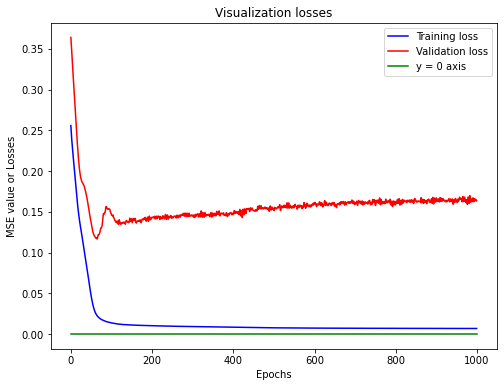

In [61]:
plot_train_history(fit,
                   'Visualization losses')

In [62]:
mpl.rcParams['figure.figsize'] = (16, 6)
mpl.rcParams['axes.grid'] = False

difference = []

length = range(len(my_test))

for i in length:
    difference.append(my_test[i] - ynew[i])

plt.figure()
plt.plot(length, my_test, 'b', label='Real data')
plt.plot(length, ynew, 'r', label='Prediction data')
#plt.plot(length, difference, 'g', label='difference data')
plt.xlabel('Test data iteration')
plt.ylabel('Test data value')
plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

ValueError: x and y must have same first dimension, but have shapes (22,) and (1, 10)

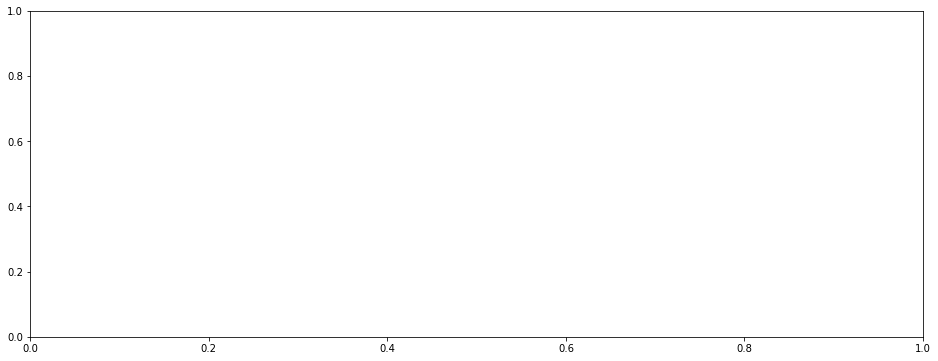

In [63]:
y = []
for i in length:
    y.append(0)

plt.figure()
plt.plot(length, difference, 'g', label='difference data')
plt.plot(length, y, 'r', label='y = 0 axis')
plt.xlabel('Test data iteration')
plt.ylabel('Test data MSE value')
plt.legend()
plt.show()